<a href="https://colab.research.google.com/github/tanushree-78/Time-Series-Analysis-COVID-19-Pandemic-and-Ebola-Epidemic/blob/main/Time_Series_Analysis_Ebola_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

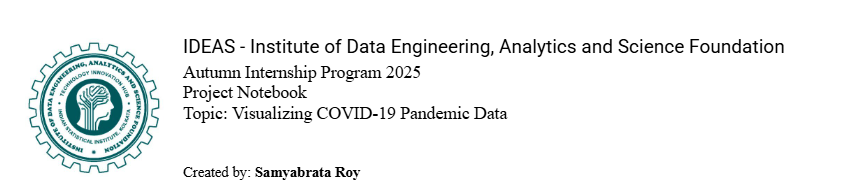

# Assignment:
Find a similart dataset (e.g. Ebola | 2014-2016 | Western Africa Ebola Outbreak ) and extract a similar visualization out of it.

checkout: https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset

##📖 Introduction

When Ebola outbreaks struck parts of Africa, the impact was immediate and devastating — not just in lives lost, but in fear, confusion, and uncertainty. Numbers poured in: suspected cases, confirmed deaths, recoveries, and regional transmission. But for many, these figures were difficult to interpret and often disconnected from the real human story unfolding on the ground.

It was only when the data was visualized — through maps, timelines, and charts — that the scale and direction of the outbreaks became truly clear. We could see which regions were hardest hit, how quickly the virus was spreading. Visualizations gave life to the numbers and made it easier for communities, health workers, and decision-makers to understand what was happening — and what needed to be done.

That’s the power of visualization. In a crisis, it turns raw data into something understandable and actionable. It helps bridge the gap between science and everyday experience — making information more accessible not just to experts, but to the people most affected.

In this notebook, we’ll focus on Ebola outbreak data in Africa and other parts of the world and explore how to visualize it using Python. We’ll learn step by step how to uncover insights hidden in the numbers — and how to tell the story of an epidemic that shaped the continent’s public health response for years to come.

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the Ebola Virus dataset.  


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  




In [ ]:
# Loading the data from google drive
# Replace with your Google Drive file ID which has public view access
file_id = "1otHvgc05npYvVT1UY7Phb2uf6WOOXH7U"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_ebola = pd.read_csv(url)

  # Show first few rows
  print(df_ebola.head())
except Exception as e:
    print(f"Error loading data: {e}")

        Country       Date  Cumulative_cases  Cumulative_deaths
0        Guinea  8/29/2014               648                430
1       Liberia  8/29/2014              1378                694
2       Nigeria  8/29/2014                19                  7
3  Sierra Leone  8/29/2014              1026                422
4        Guinea   9/5/2014               812                517


# Data cleaning and organization

We need to clean and organize the data first to perform further analysis. In the given dataset, not all dates include data for every country. A country only appears on a specific date if it has reported a case on that date. As a result, the data is incomplete, and we need to ensure that each country is represented for every date.

In [ ]:
# Data organization
df_ebola = df_ebola.copy()
df_ebola['Date'] = pd.to_datetime(df_ebola['Date'])

# Get the full range of all dates and countries-- the dates are not continous here
all_dates = df_ebola['Date'].unique()
all_countries = df_ebola['Country'].unique()

# Create a new, complete DataFrame with every combination
# It creates a grid of all possible date-country pairs.
date_country_grid = pd.MultiIndex.from_product(
    [all_dates, all_countries],
    names=['Date', 'Country']
).to_frame(index=False)

# Merge the original data with the complete grid
# A left merge will keep all rows from the new grid
# Rows that don't match will have NaN for Cases and Deaths
df_ebola_merged = pd.merge(
    date_country_grid,
    df_ebola,
    on=['Date', 'Country'],
    how='left'
)

# Fill the NaN values with 0
# It is important to remember that `df_complete['Cases']` will have NaN, so we fill these with 0
df_ebola_merged['Cumulative_cases'] = df_ebola_merged['Cumulative_cases'].fillna(0)
df_ebola_merged['Cumulative_deaths'] = df_ebola_merged['Cumulative_deaths'].fillna(0)

# Sort the final DataFrame for by date
df_ebola_complete = df_ebola_merged.sort_values(by=['Date']).reset_index(drop=True)

# Print the result to verify
print(df_ebola_complete.head(15))
print(df_ebola_complete.tail(15))


df_ebola_arranged=df_ebola_complete.copy()

         Date                   Country  Cumulative_cases  Cumulative_deaths
0  2014-08-29                    Guinea             648.0              430.0
1  2014-08-29                   Liberia            1378.0              694.0
2  2014-08-29                   Nigeria              19.0                7.0
3  2014-08-29              Sierra Leone            1026.0              422.0
4  2014-08-29                   Senegal               0.0                0.0
5  2014-08-29  United States of America               0.0                0.0
6  2014-08-29                     Spain               0.0                0.0
7  2014-08-29                      Mali               0.0                0.0
8  2014-08-29            United Kingdom               0.0                0.0
9  2014-08-29                     Italy               0.0                0.0
10 2014-09-05                     Italy               0.0                0.0
11 2014-09-05            United Kingdom               0.0                0.0

# Addition of New Columns

To find the analysis results, we need to calculate daily new_cases and new_deaths from the cumulative cases and deaths columns in the data.

In [ ]:
#corrected code of above

# In the data only Cumulative cases and deaths columns are present. So for better analysis creating new columns New_cases and New_Deaths
# But for some rows the new cases and deaths are coming out to be negative. So in order to correct this problem we assign 0 in place of these negative values
df_ebola_copy = df_ebola_arranged.copy()

# Sort the data by Country and Date to ensure correct difference calculation
df_ebola_copy = df_ebola_copy.sort_values(by=['Country', 'Date'])

# Calculate initial daily new cases and deaths.
# The `diff()` method calculates the difference between consecutive rows within each group.
df_ebola_copy['New_cases'] = df_ebola_copy.groupby('Country')['Cumulative_cases'].diff().fillna(df_ebola_copy['Cumulative_cases'])
df_ebola_copy['New_deaths'] = df_ebola_copy.groupby('Country')['Cumulative_deaths'].diff().fillna(df_ebola_copy['Cumulative_deaths'])

# Set any negative values in 'New_cases' and 'New_deaths' to 0
df_ebola_copy['New_cases'] = df_ebola_copy['New_cases'].clip(lower=0)
df_ebola_copy['New_deaths'] = df_ebola_copy['New_deaths'].clip(lower=0)

# Sort by Date for the final output as requested by the user
df_ebola_final = df_ebola_copy.sort_values(by=['Date']).copy()

# Print the first few rows to verify the result
print(df_ebola_final.head(22))

         Date                   Country  Cumulative_cases  Cumulative_deaths  \
0  2014-08-29                    Guinea             648.0              430.0   
4  2014-08-29                   Senegal               0.0                0.0   
6  2014-08-29                     Spain               0.0                0.0   
2  2014-08-29                   Nigeria              19.0                7.0   
7  2014-08-29                      Mali               0.0                0.0   
8  2014-08-29            United Kingdom               0.0                0.0   
1  2014-08-29                   Liberia            1378.0              694.0   
5  2014-08-29  United States of America               0.0                0.0   
9  2014-08-29                     Italy               0.0                0.0   
3  2014-08-29              Sierra Leone            1026.0              422.0   
19 2014-09-05                   Senegal               1.0                0.0   
18 2014-09-05                    Guinea 

## EDA including visualization

In the EDA, we will perform the following visualizations:

1. **Line plots for daily cases in the top 5 affected countries**  
   (Initially with Matplotlib to highlight limitations, then with Plotly for interactivity).

2. **Stacked and double bar charts for new cases vs new deaths by WHO region**  
   (To show region was more saceptable to COVID-19).  

3. **Heatmap of case intensity by date and region**  
   (To visualize hotspots and the spread over time).  




---


### Plot 1

This code identifies the top 5 countries with the highest cumulative Ebola virus cases, filters their data, and then plots line graphs of daily new cases over time for each of those countries using Matplotlib.

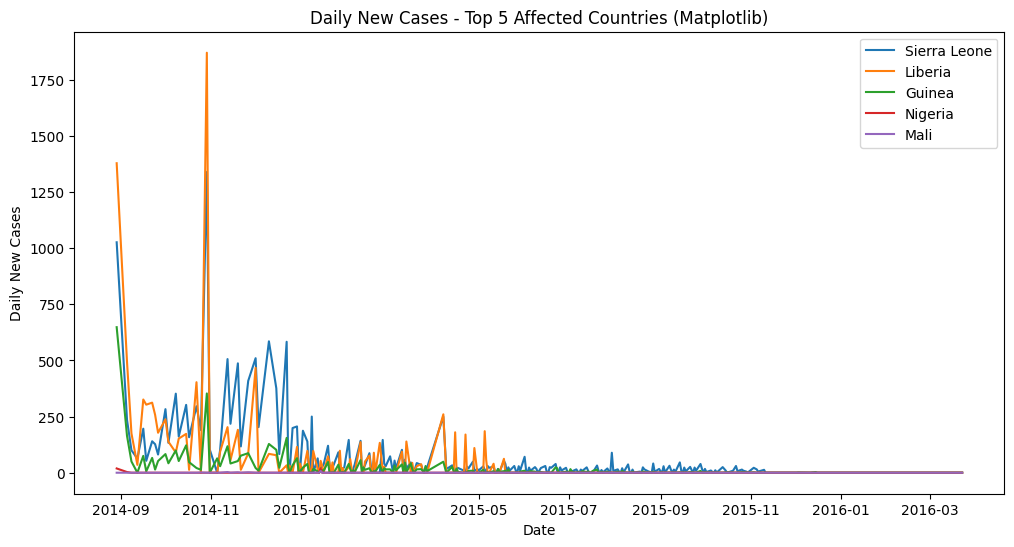

In [ ]:
# Exploratory Data Analysis
# 1. Line plots for daily cases in the top 5 affected countries

# Find top 5 affected countries by cumulative cases
top5_countries = (
    df_ebola_final.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)
# the above code first finds the max cummulative cases for each country,i.e., highest will be on the last date, then it sorts the countries in descending order acc. to
#these max cummulative cases and then find the index of top 5 countries

# Filter data
df_top5 = df_ebola_final[df_ebola_final["Country"].isin(top5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()


# Question:
What we should have done instead to plot the top 5 countries least affected by Ebola?

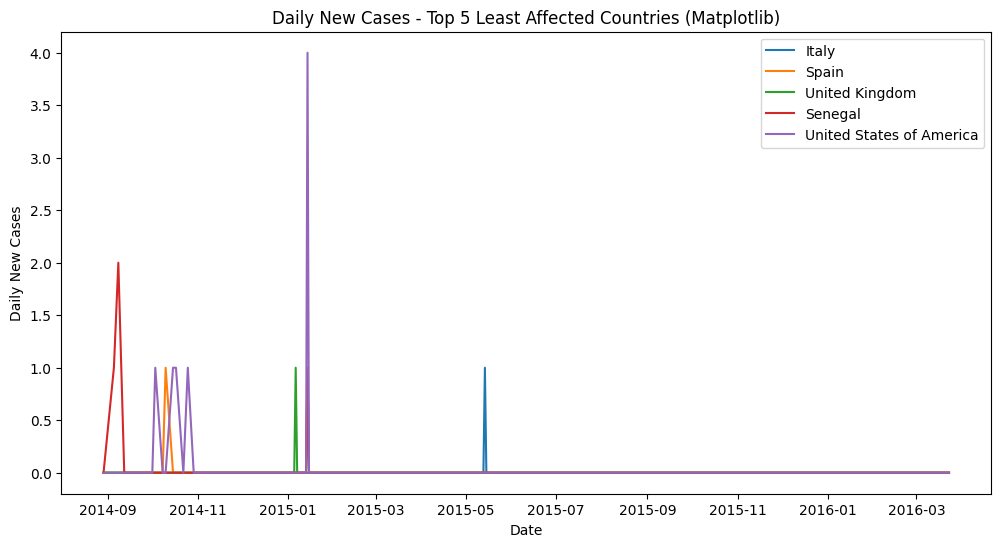

In [ ]:
# 1. Line plots for daily cases in the top 5 least affected countries

# Find top 5 least affected countries by cumulative cases
top5_least_countries = (
    df_ebola_final.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=True)
    .head(5)
    .index
)
# the above code first finds the max cummulative cases for each country,i.e., highest will be on the last date, then it sorts the countries in ascending order acc. to
#these max cummulative cases and then find the index of top 5 countries(least affected by covid-19)

# Fill NaN values in 'New_cases' and 'New_deaths' with 0
df_ebola_final.loc[:, 'New_cases'] = df_ebola_final['New_cases'].fillna(0)
#df_covid_trimmed.loc[:, 'New_deaths'] = df_covid_trimmed['New_deaths'].fillna(0)

# Filter data
df_top5_least = df_ebola_final[df_ebola_final["Country"].isin(top5_least_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_least_countries:
    country_data = df_top5_least[df_top5_least["Country"] == country]
    plt.plot(country_data["Date"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Least Affected Countries (Matplotlib)")
plt.legend()
plt.show()

# Task
Create a line plot which shows daily global new cases as one dramatic mountain shape

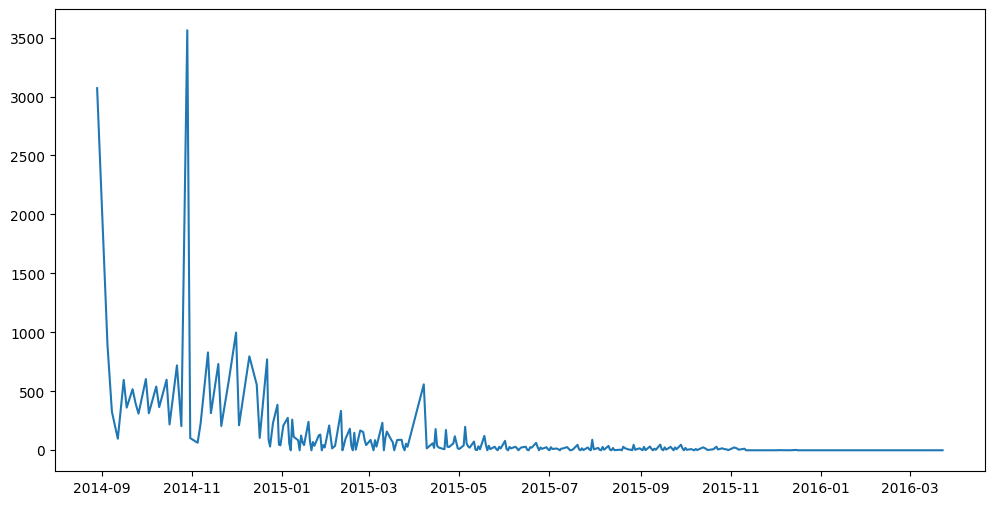

In [ ]:
# Plot for new cases globally(sum of new cases of all countries)

# Calculate global new cases by summing new cases for each date

global_cases = df_ebola_final.groupby('Date')['New_cases'].sum().reset_index()
# The global_cases is a pandas Series where the 'Date' are the index and the sum of new_cases are the values. By adding .reset_index() we are converting this
# Series back into a DataFrame where The original index ('Date') becomes a regular column and sum of new cases become a column named 'Cumulative_New_Cases'.

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(global_cases['Date'], global_cases['New_cases'])

# plotting code
plt.show()



---

### Plot 2

This code aggregates Ebola new cases and deaths by quarter and visualizes them using a stacked bar chart, where deaths are shown on top of cases. It highlights the timeline of the virus's impact, making it easier to compare peaks and proportions across different periods.

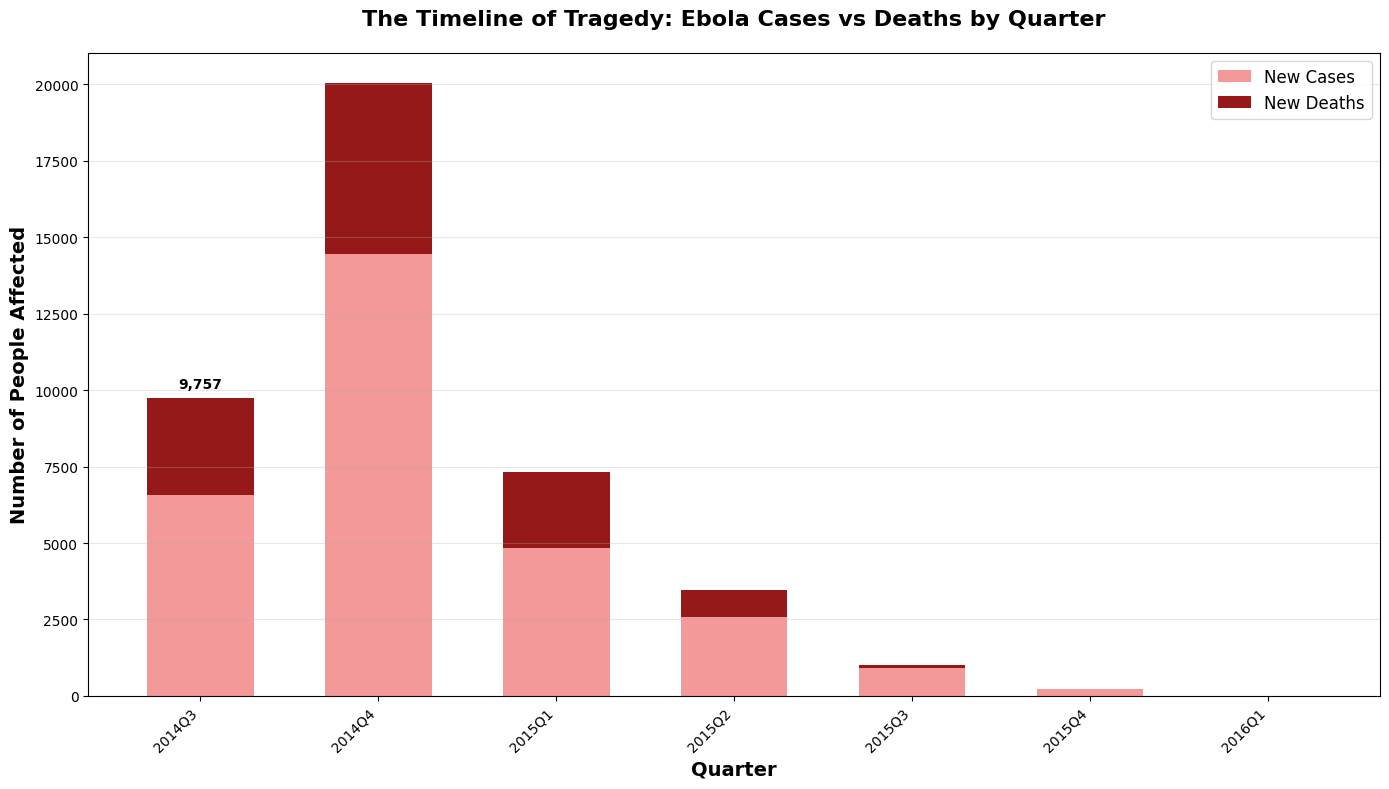

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Stacked bar chart for new cases vs new deaths by country
# Cases vs Deaths Over Time (Quarterly)

# Show the relationship between cases and deaths over time periods

# Create quarterly data for cleaner visualization
df_copy = df_ebola_final.copy()
df_copy['Quarter'] = df_copy['Date'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars
width = 0.6
cases_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_cases'],
                       width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_deaths'],
                        width, bottom=quarterly_data['New_cases'],
                        label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title('The Timeline of Tragedy: Ebola Cases vs Deaths by Quarter',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value annotations on the bars
for i, (cases, deaths) in enumerate(zip(quarterly_data['New_cases'], quarterly_data['New_deaths'])):
  # Annotate total at the top
  total = cases + deaths
  ax.annotate(f'{total:,.0f}',
                xy=(i, total),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontweight='bold', fontsize=10)

  plt.tight_layout()
  plt.show()

  # Print insights
  max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
  max_cases = quarterly_data['New_cases'].max()

# Task
Convert the above chart to double bar chart with the same data

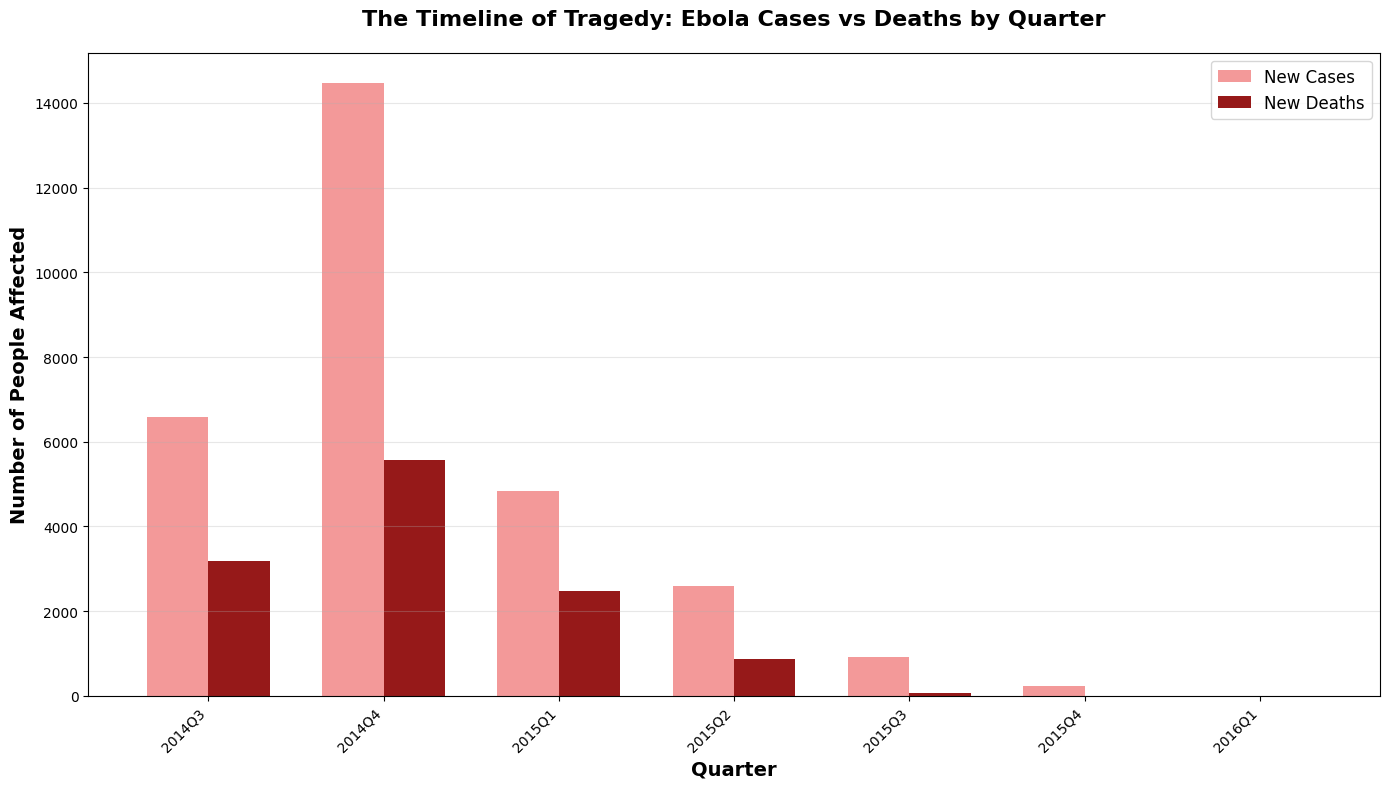

In [ ]:
# Double bar chart for new cases vs new deaths by Country
# Cases vs Deaths Over Time (Quarterly)

# Show the relationship between cases and deaths over time periods

# Create quarterly data for cleaner visualization
df_copy = df_ebola_final.copy()
df_copy['Quarter'] = df_copy['Date'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the double bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars
bar_width = 0.35
x = np.arange(len(quarterly_data['Quarter_str'])) # the label locations

# Create bars for New Cases and New Deaths side by side
cases_bars = ax.bar(x - bar_width/2, quarterly_data['New_cases'],
                       bar_width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(x + bar_width/2, quarterly_data['New_deaths'],
                        bar_width, label='New Deaths', color='darkred', alpha=0.9)


# Customize the plot
ax.set_title('The Timeline of Tragedy: Ebola Cases vs Deaths by Quarter',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Set the x-axis ticks to be at the center of the grouped bars
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data['Quarter_str'])

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value annotations on the bars (Optional: can be cluttered for many bars)
# for bars in [cases_bars, deaths_bars]:
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:,.0f}',
#                     xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom',
#                     fontsize=8)


plt.tight_layout()
plt.show()

# Print insights
max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
max_cases = quarterly_data['New_cases'].max()

# Task
Construct a pie chart which Shows just top 4 countries mostly affected by Ebola Virus ( by cummulative deaths)

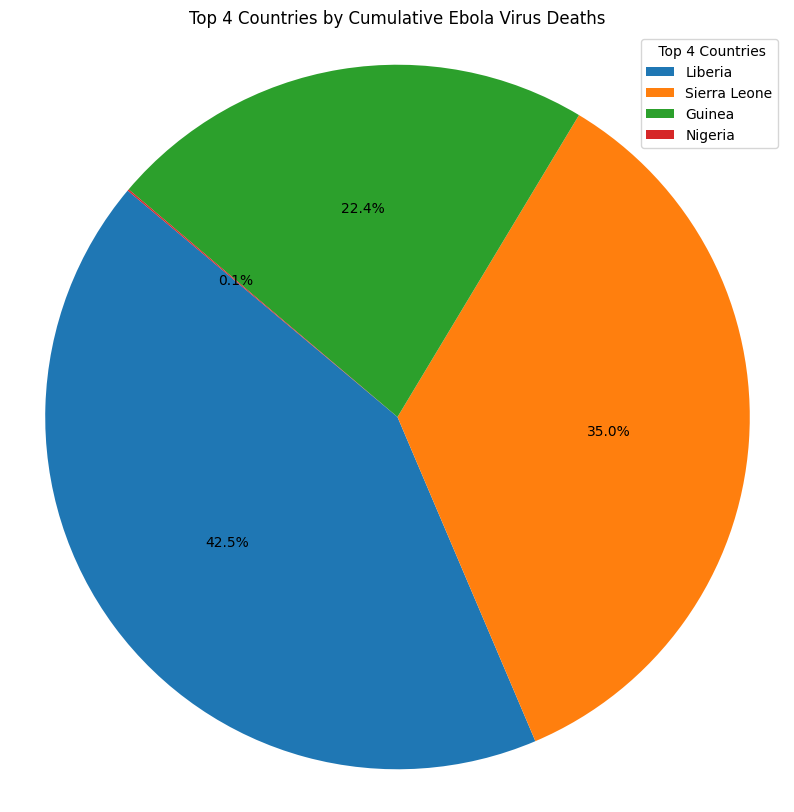

In [ ]:
# Get the top 4 countries by cumulative deaths
# Since we want to find cummulative values of deaths for each country thus we are converting the following series to data frame
cumulative_deaths_by_country = df_ebola_final.groupby('Country')['Cumulative_deaths'].max().reset_index()

# Get the top 10 countries by cumulative deaths
top_4_countries_deaths = cumulative_deaths_by_country.sort_values(by='Cumulative_deaths', ascending=False).head(4)

# Alternatively we can use .nlargest()
#top_10_countries_deaths = cumulative_deaths_by_country.nlargest(10, 'Cumulative_deaths')

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_4_countries_deaths['Cumulative_deaths'], autopct='%1.1f%%', startangle=140)
plt.title('Top 4 Countries by Cumulative Ebola Virus Deaths')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Place a legend outside the plot
labels=top_4_countries_deaths['Country']
plt.legend(labels, title=" Top 4 Countries", loc="best")
plt.show()



---

### Plot 3

We aggregated monthly Ebola new cases by country and visualized them using a heatmap.
This highlights when and where case surges were most intense across different countries.

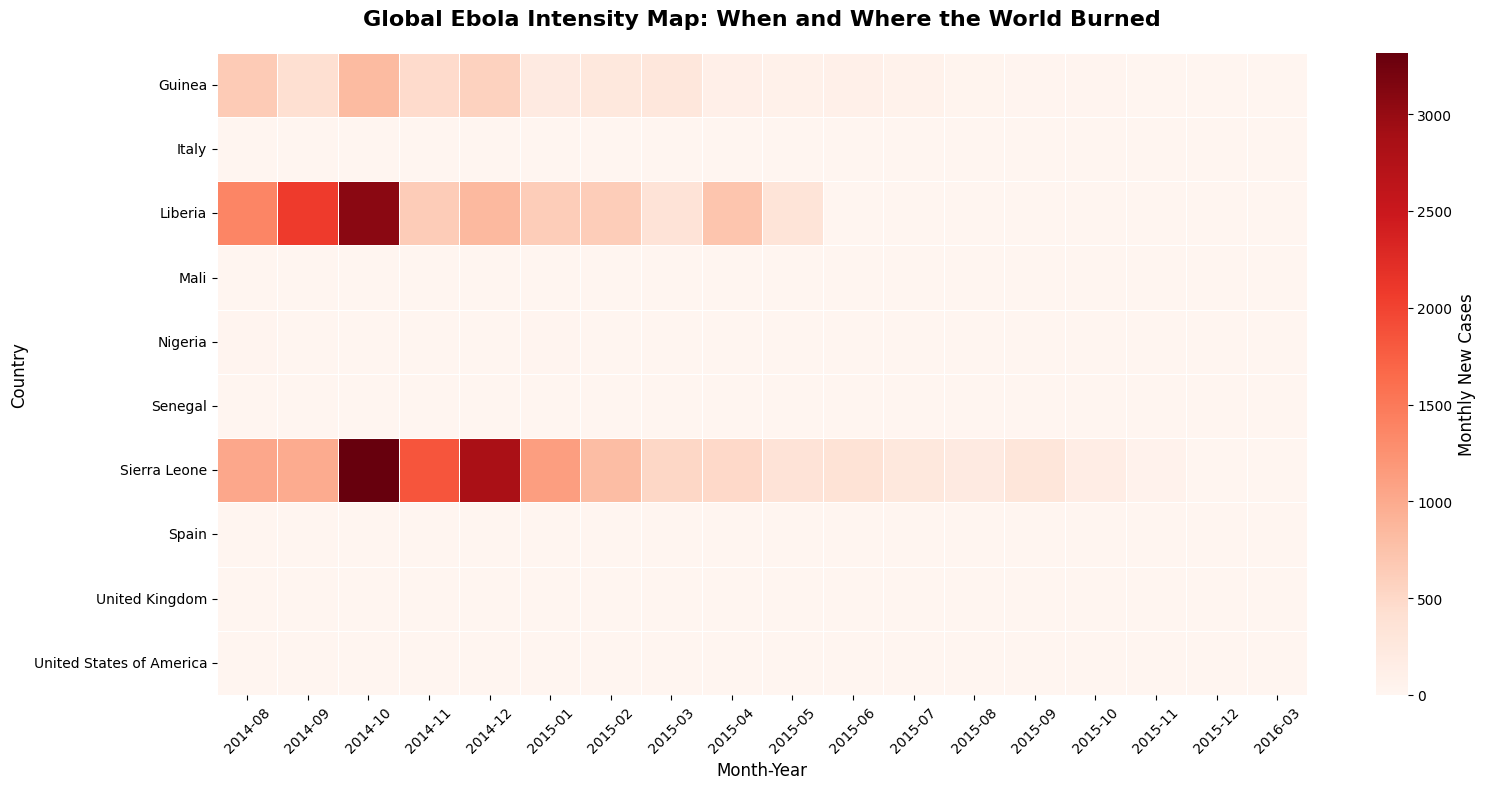

In [ ]:
# Heatmap of case intensity by date and Country
#Create a powerful heatmap showing intensity across Countries and time
# Create monthly data for cleaner visualization
df_monthly = df_ebola_final.copy()
df_monthly['Month_Year'] = df_monthly['Date'].dt.to_period('M')

# Aggregate by WHO region and month
heatmap_data = df_monthly.groupby(['Country', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Country', columns='Month_Year', values='New_cases')

# Fill missing values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

# Use a dramatic color scheme
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global Ebola Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

# Task:
Visualize another heatmap showing quaterly new deaths' intensity by countries.

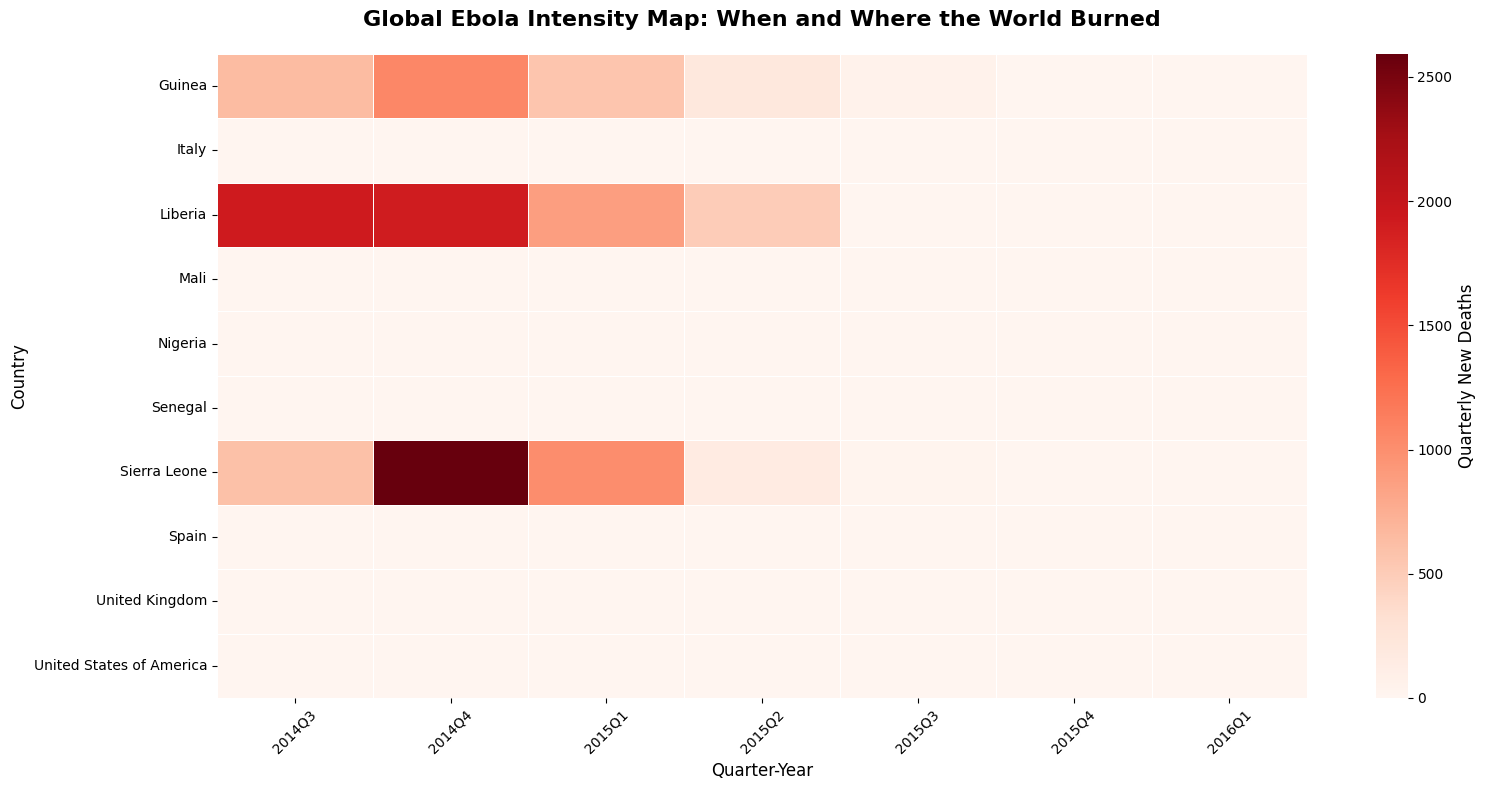

In [ ]:
# Heatmap of case intensity by date and Country
#Create a powerful heatmap showing intensity across Country and time
# Create monthly data for cleaner visualization
df_quarter = df_ebola_final.copy()
df_quarter['Quarter_Year'] = df_quarter['Date'].dt.to_period('Q')

# Aggregate by WHO region and month
heatmap_data = df_quarter.groupby(['Country', 'Quarter_Year'])['New_deaths'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Country', columns='Quarter_Year', values='New_deaths')

# Fill missing values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

# Use a dramatic color scheme
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Quarterly New Deaths'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global Ebola Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quarter-Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

# Task:
Visualize a heatmap showing monthly new cases' intensity by top 5 countries

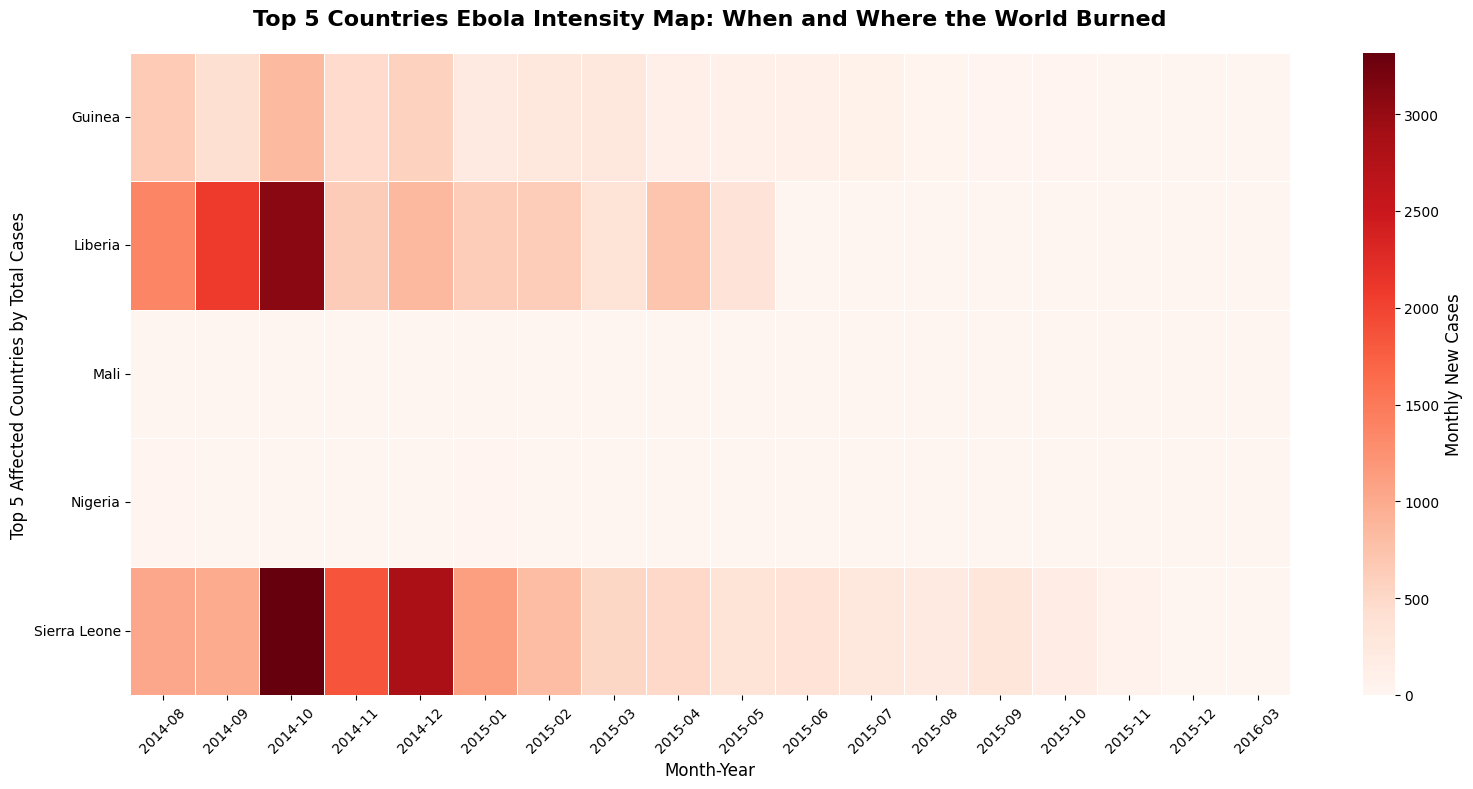

In [ ]:
# Heatmap of case intensity by date and Country
#Create a powerful heatmap showing intensity across country and time
# Create monthly data for cleaner visualization

top5_countries = (
    df_ebola_final.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
df_top5 = df_ebola_final[df_ebola_final["Country"].isin(top5_countries)]

df_monthly2 = df_top5.copy()
df_monthly2['Month_Year'] = df_monthly2['Date'].dt.to_period('M')

# Aggregate by WHO region and month
heatmap_data = df_monthly2.groupby(['Country', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Country', columns='Month_Year', values='New_cases')

# Fill missing values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

# Use a dramatic color scheme
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Top 5 Countries Ebola Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Top 5 Affected Countries by Total Cases', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

# Interactive Ebola Dashboard with Plotly
In this section, we build an interactive dashboard to explore the Ebola dataset using Plotly.
The dashboard allows dynamic filtering, visualization, and comparison of different trends such as

Daily New Cases and Deaths across countries
Cumulative trends over time
Stacked bar charts and line plots for deeper insights
This interactive approach provides users with the flexibility to investigate the data from multiple perspectives,
making the analysis more engaging and intuitive compared to static charts.

# About Plotly
Plotly is a powerful, open-source Python library that allows us to create interactive and publication-quality visualizations—like line plots, bar charts, heatmaps, and more—right inside our notebooks. It enables users to zoom, hover, and explore data dynamically, making data storytelling both engaging and intuitive.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# ---- 1. Line Chart: Global New Cases Over Time ----
fig_cases = px.line(
    df_ebola_final.groupby('Date', as_index=False).sum(),
    x="Date",
    y="New_cases",
    title="Global New Ebola Cases Over Time"
)

# ---- 2. Line Chart: Global New Deaths Over Time ----
fig_deaths = px.line(
    df_ebola_final.groupby('Date', as_index=False).sum(),
    x="Date",
    y="New_deaths",
    title="Global New Ebola Deaths Over Time",
    color_discrete_sequence=["red"]
)

# ---- 3. Stacked Bar Chart: New Cases vs New Deaths grouped by WHO Region ----
region_grouped = df_ebola_final.groupby(['Date', 'Country'], as_index=False)[['New_cases', 'New_deaths']].sum()

fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date"],
    y=region_grouped["New_cases"],
    name="New Cases",
    marker_color="blue"
))
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date"],
    y=region_grouped["New_deaths"],
    name="New Deaths",
    marker_color="red"
))

fig_stacked.update_layout(
    barmode="stack",
    title="New Cases vs New Deaths (Stacked) by country",
    xaxis_title="Date",
    yaxis_title="Count",
)

# ---- 4. Choropleth Map: Total Cases by Country ----
country_grouped = df_ebola_final.groupby('Country', as_index=False)['Cumulative_cases'].max()

fig_map = px.choropleth(
    country_grouped,
    locations="Country",
    locationmode="country names",
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Global Distribution of Total Ebola Cases"
)

# ---- Display all interactive charts ----
fig_cases.show()
fig_deaths.show()
fig_stacked.show()
fig_map.show()


# Question
Interpret the above map shown

The above map shows that:
1. West Africa was most affected wherein countries like Guinea, Sierra Leone, and Liberia have very high cumulative case counts, in the thousands to over 14,000 cases. These countries were at the epicenter of the 2014–2016 Ebola outbreak, which aligns with the data shown.

2. United States and some European countries have very few cumulative cases. Likely represent imported cases or isolated outbreaks, not large-scale transmission.

3. Other Countries (e.g., Spain, Italy, UK) have limited number of cases, likely due to travel-related infections or medical personnel returning from affected area.